# Exploratory Data Analysis for Machine Learning - Course Project

### Dataset Used : Coursera Course Dataset
#### URL : https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset

## Data Brief
Course dataset scrapped from Coursera website. This dataset contains mainly 6 columns and 890 course data. The detailed description:

1. course_title : Contains the course title.
2. course_organization : It tells which organization is conducting the courses.
3. courseCertificatetype : It has details about what are the different certifications available in courses.
4. course_rating : It has the ratings associated with each course.
5. course_difficulty : It tells about how difficult or what is the level of the course.
6. coursestudentsenrolled : It has the number of students that are enrolled in the course.

### Data Loading and Basic Review

Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

Data Loading and Basic Exploration

In [2]:
df=pd.read_csv("coursea_data.csv")
df.head()

,index,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


So, 1 numarical object only. But, we can turn some others to numarical too.

In [4]:
df.describe()

,index,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


Mean course rating is 4.677329. Quite high, as the rating can be given from 0-5. Minimum is 3.3, highest is 5 - proves so.

### Initial plan for data exploration

Data Exploration
1. Ploting course_rating to get a overview of the distribution.
2. analyzing course Certificate types values.

Data Cleaning
1. Deleting first Unnamed column
2. Deleting course name - not necessary now; as all the values are unique

#### Data Exploration
Basic Rating distribution : 

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5fb607730>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5fb607d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5fb6072e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5fbcb64f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5fbcb6880>],
 'means': []}

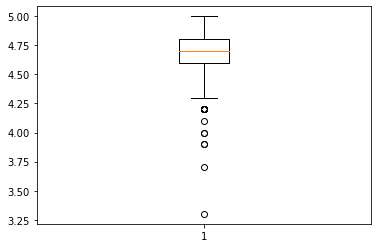

In [5]:
# Ploting course_rating to get a overview of the distribution.
plt.boxplot(df['course_rating'])

<AxesSubplot:>

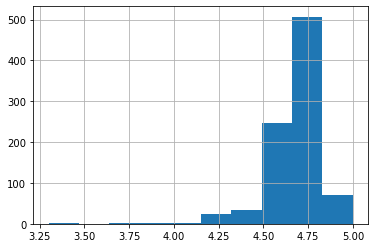

In [6]:
# Ploting course_rating to get a overview of the distribution.
df['course_rating'].hist()

#### Findings:
Average course rating is quite higher, compared to lowest and maximum value.

Rating distribution per course difficulty :

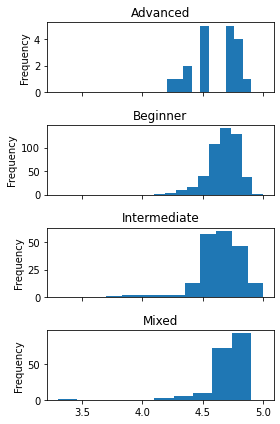

In [7]:
g = df.groupby('course_difficulty')['course_rating']
fig, axes = plt.subplots(g.ngroups, sharex=True, figsize=(4, 6))

for i, (type,rating) in enumerate(g):
    ax = rating.plot.hist('course_rating',ax=axes[i], legend=False,title=type)
fig.tight_layout()

#### Insight: 
Advanced courses' rating has some ups-and downs; maybe due to low frequency.<br>
Beginner course has distribution quite similiar to total rating chart.<br>
Intermidiate course's rating top is not as sharp of others, that may say - as the participants has some knowledge on the topic, they can judge better and being critical.


Rating distribution per course type :

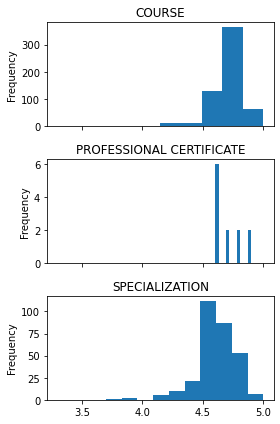

In [68]:
g = df.groupby('course_Certificate_type')['course_rating']
fig, axes = plt.subplots(g.ngroups, sharex=True, figsize=(4, 6))

for i, (type,rating) in enumerate(g):
    ax = rating.plot.hist('course_rating',ax=axes[i], legend=False,title=type,bins=10)
fig.tight_layout()

In [69]:
g.describe()

,count,mean,std,min,25%,50%,75%,max
course_Certificate_type,,,,,,,,
COURSE,582.0,4.707045,0.151647,3.3,4.6,4.70,4.8,5.0
PROFESSIONAL CERTIFICATE,12.0,4.700000,0.120605,4.6,4.6,4.65,4.8,4.9
SPECIALIZATION,297.0,4.618182,0.167874,3.7,4.5,4.60,4.7,5.0


#### Findings and Insight:
1. Specializations has lower mean value than courses, but the distribution is interesting. specialization has good distribution values on right, but normal courses are on left.

Combined

In [ ]:
g = df.groupby(['course_difficulty','course_Certificate_type'])['course_rating']
fig, axes = plt.subplots(g.ngroups, sharex=True, figsize=(4, 20))

for i, (type,rating) in enumerate(g):
    axes[i].set_ylim(0, 100)
    ax = rating.plot.hist('course_rating',ax=axes[i], legend=False,title=type[0]+"-"+type[1].lower(),bins=10)
fig.tight_layout()

Analyzing course Certificate types values.

<AxesSubplot:ylabel='course_difficulty'>

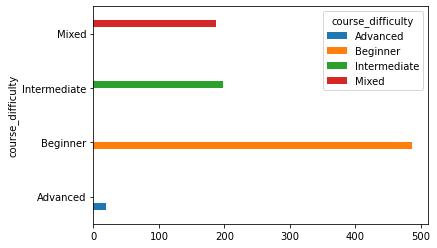

In [10]:
df.groupby('course_difficulty').course_difficulty.value_counts().unstack().plot.barh()

<AxesSubplot:ylabel='course_Certificate_type'>

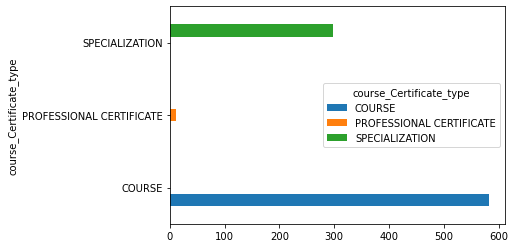

In [11]:
df.groupby('course_Certificate_type').course_Certificate_type.value_counts().unstack().plot.barh()

#### Data Cleaning
1. Deleting first Unnamed column
2. Deleting course name - not necessary now; as all the values are unique

In [12]:
df=df.drop(['course_title','index'],1)

C:\Users\AZMINE~1\AppData\Local\Temp/ipykernel_1112/1849970809.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop(['course_title','index'],1)


### Feature Engineering

1. Modifying course_students_enrolled column

In [37]:
df_fe1=df.copy()


In [35]:
def course_students_enrolled_modifier(x):
    return x[:-2]

In [38]:
df_fe1['course_students_enrolled_modified']=df_fe1['course_students_enrolled'].apply(course_students_enrolled_modifier)
df_fe1['course_students_enrolled_modified']=df_fe1['course_students_enrolled_modified'].apply(pd.to_numeric)
df_fe1 =df_fe1.drop(['course_students_enrolled'],1)
df_fe1

C:\Users\AZMINE~1\AppData\Local\Temp/ipykernel_1112/1190035295.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_fe1 =df_fe1.drop(['course_students_enrolled'],1)


,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled_modified
0,(ISC)²,SPECIALIZATION,4.7,Beginner,5.0
1,University of Pennsylvania,COURSE,4.7,Intermediate,1.0
2,Johns Hopkins University,COURSE,4.5,Mixed,13.0
3,Yale University,COURSE,4.7,Mixed,9.0
4,Indian School of Business,COURSE,4.8,Mixed,32.0
...,...,...,...,...,...
886,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,5.0
887,Saint Petersburg State University,COURSE,4.8,Mixed,2.0
888,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,3.0
889,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.0


2. Modifying course_difficulty column to numarical

In [43]:
def course_difficulty_modifier(x):
    if x=="Beginner":
        return "0"
    elif x=="Intermediate":
        return "1"
    elif x=="Mixed":
        return "0.5"
    elif x=="Advanced":
        return "2"
    else:
        return "0" 
"""as most courses are beginner level, we are assuming undefined will be beginner too."""

'as most courses are beginner level, we are assuming undefined will be beginner too.'

In [45]:
df_fe1['course_difficulty_modified']=df_fe1['course_difficulty'].apply(course_difficulty_modifier)
df_fe1['course_difficulty_modified']=df_fe1['course_difficulty_modified'].apply(pd.to_numeric)
df_fe1 =df_fe1.drop(['course_difficulty'],1)
df_fe1

C:\Users\AZMINE~1\AppData\Local\Temp/ipykernel_1112/3917968105.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_fe1 =df_fe1.drop(['course_difficulty'],1)


,course_organization,course_Certificate_type,course_rating,course_students_enrolled_modified,course_difficulty_modified
0,(ISC)²,SPECIALIZATION,4.7,5.0,0.0
1,University of Pennsylvania,COURSE,4.7,1.0,1.0
2,Johns Hopkins University,COURSE,4.5,13.0,0.5
3,Yale University,COURSE,4.7,9.0,0.5
4,Indian School of Business,COURSE,4.8,32.0,0.5
...,...,...,...,...,...
886,Mail.Ru Group,SPECIALIZATION,4.5,5.0,1.0
887,Saint Petersburg State University,COURSE,4.8,2.0,0.5
888,E-Learning Development Fund,SPECIALIZATION,4.5,3.0,1.0
889,Saint Petersburg State University,SPECIALIZATION,4.6,9.0,1.0


#### Data Exploration of newly engineered columns

In [47]:
df_fe1[['course_difficulty_modified','course_students_enrolled_modified']].describe()

,course_difficulty_modified,course_students_enrolled_modified
count,891.000000,881.000000
mean,0.369809,8.511918
std,0.472738,10.731756
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,5.000000
75%,0.500000,9.000000
max,2.000000,83.000000


course_students_enrolled_modified has some empty columns, so we have to fill them. 

<AxesSubplot:ylabel='Frequency'>

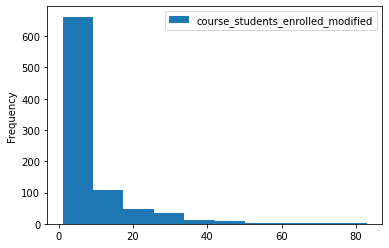

In [55]:
df_fe1[['course_students_enrolled_modified']].plot.hist()

so , most of the frequencies are in between 0-10, so, using average-1; so avoid the effect of outliers.

In [56]:
df_fe1['course_students_enrolled_modified'].fillna((df_fe1['course_students_enrolled_modified'].mean()-1), inplace=True)
df_fe1[['course_difficulty_modified','course_students_enrolled_modified']].describe()

,course_difficulty_modified,course_students_enrolled_modified
count,891.000000,891.000000
mean,0.369809,8.500695
std,0.472738,10.671816
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,5.000000
75%,0.500000,9.000000
max,2.000000,83.000000


In [62]:
df_numaric=df_fe1.select_dtypes(include=np.number)

#### Finding relation between columns

In [58]:
corrM = df_numaric.corr()
corrM

,course_rating,course_students_enrolled_modified,course_difficulty_modified
course_rating,1.000000,0.015939,-0.089810
course_students_enrolled_modified,0.015939,1.000000,-0.011343
course_difficulty_modified,-0.089810,-0.011343,1.000000


In [ ]:
df_numaric.plot.scatter(x='course_rating', y='course_difficulty_modified',c='DarkBlue')

#### Findings : 
No effective coorelation.

### Key Findings and Insights

1. Average course rating is quite higher, compared to lowest and maximum value. So, the cours quality is being maintained.
2. Advanced courses' rating has some ups-and downs; maybe due to low frequency.
3. Beginner course has distribution quite similiar to total rating chart, as big portion of the data is from them, and he number of beginner level courses are high.
4. Intermidiate course's rating top is not as sharp of others, that may say - as the participants has some knowledge on the topic, they can judge better and being critical.
5. Specializations has lower mean value than courses, but the distribution is interesting. specialization has good distribution values on right, but normal courses are on left.
6. No effective coorelation between course_difficulty,course_students_enrolled, course rating.